In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from small_script.myFunctions import *

plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def get_data(pre, pdb_list):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        name = p.lower()[:4]
        for i in range(20):
            for ii in range(3):
                location = pre + f"all_simulations/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# perfect frag memory, no mediated interaction

In [13]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/single_memory_no_gamma.csv")

File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/8/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/8/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/9/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/9/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/15/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/4cpv/simulation/15/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_no_gamma/all_simulations/2mhr/simulation/18/1/wham.dat' does not exist
File b'/Users/wei

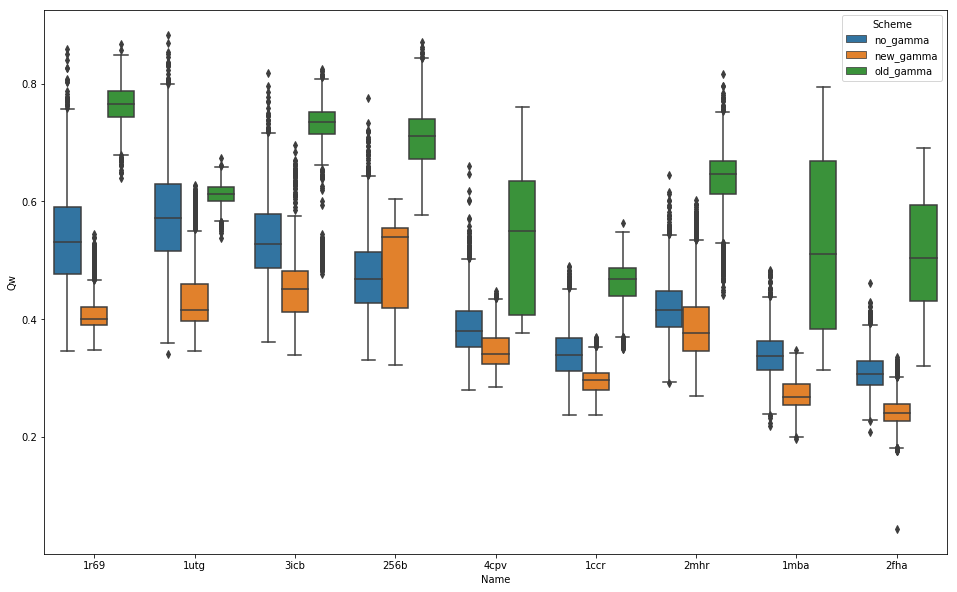

In [45]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_no_gamma.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_old_gamma.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_new_gamma.csv", index_col=0)
d = pd.concat([data.assign(Scheme="no_gamma")
              , data3.assign(Scheme="new_gamma"), data2.assign(Scheme="old_gamma")])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

In [30]:
data.groupby("Name")["Qw"].max()

Name
1ccr    0.489935
1mba    0.483023
1r69    0.859345
1utg    0.882923
256b    0.775495
2fha    0.460386
2mhr    0.644547
3icb    0.818924
4cpv    0.660385
Name: Qw, dtype: float64

# perfect frag memory. new gamma

In [43]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/single_memory_new_gamma.csv")

File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/4cpv/simulation/4/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/4cpv/simulation/4/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/4cpv/simulation/19/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/4cpv/simulation/19/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/1mba/simulation/7/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/1mba/simulation/7/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4_new_gamma/all_simulations/1mba/simulation/8/1/wham.dat' does not exist
File b'/Use

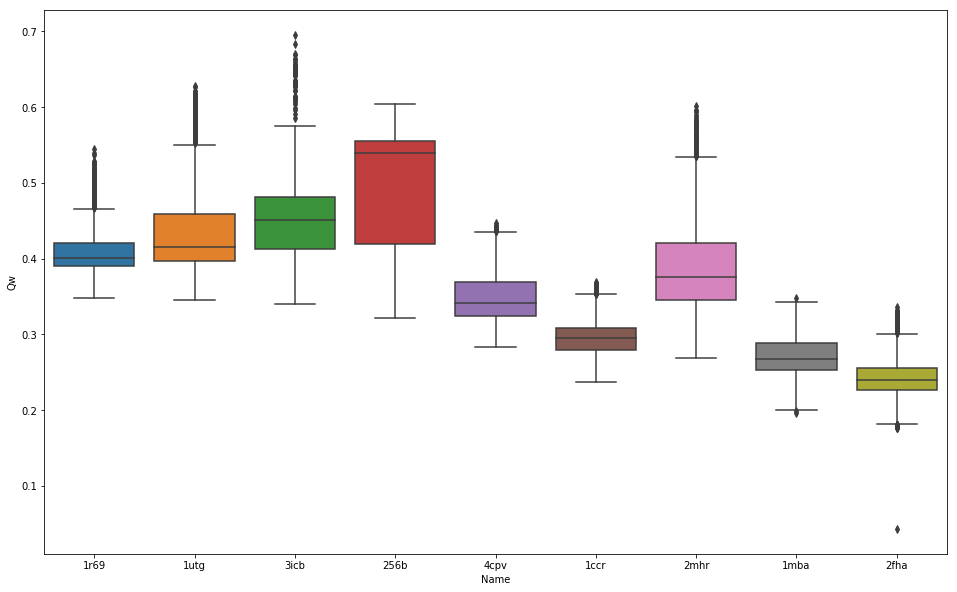

In [12]:
sns.boxplot("Name", "Qw", data=data)

# with perfect frag memory.(single memory), old gamma

In [31]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_4/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/single_memory_old_gamma.csv")

File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/8/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/8/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/9/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/9/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/17/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/4cpv/simulation/17/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulations/1mba/simulation/4/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_4/all_simulat

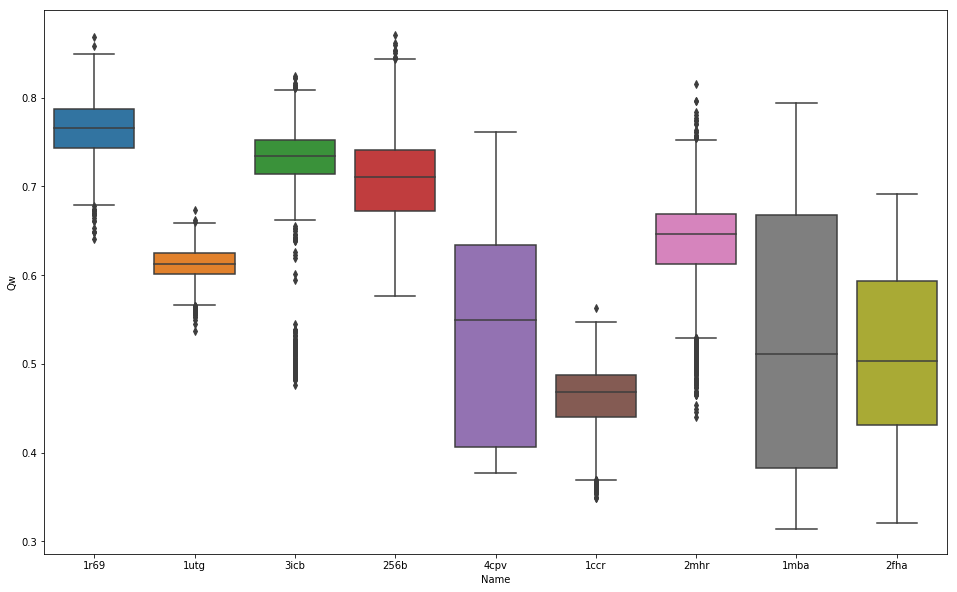

In [10]:
sns.boxplot("Name", "Qw", data=data)

# with new gamma from first iteration

In [5]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)

File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/4cpv/simulation/1/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/4cpv/simulation/1/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/2mhr/simulation/6/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/2mhr/simulation/14/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/2mhr/simulation/14/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/1mba/simulation/1/1/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_3_again/all_simulations/1mba/simulation/1/2/wham.dat' does not exist
File b'/Users/weilu/Research/server/jan

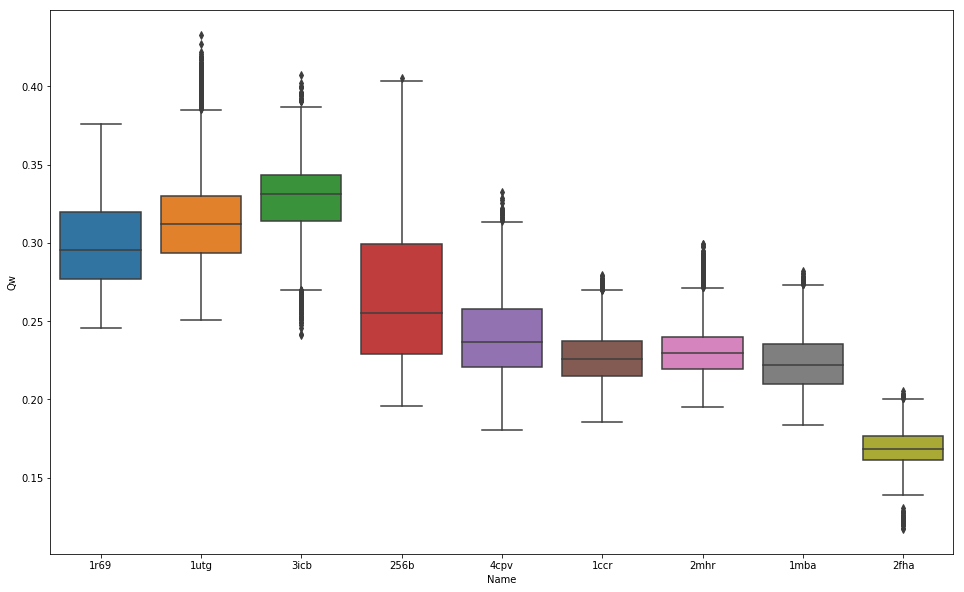

In [8]:
sns.boxplot("Name", "Qw", data=data)

In [151]:
pre = "/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)

File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/6/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/6/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/8/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/8/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/11/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/11/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_3/all_simulations/4cpv/simulation/12/1/wham.dat' does not exist
File b'/Users/weilu/Research/se

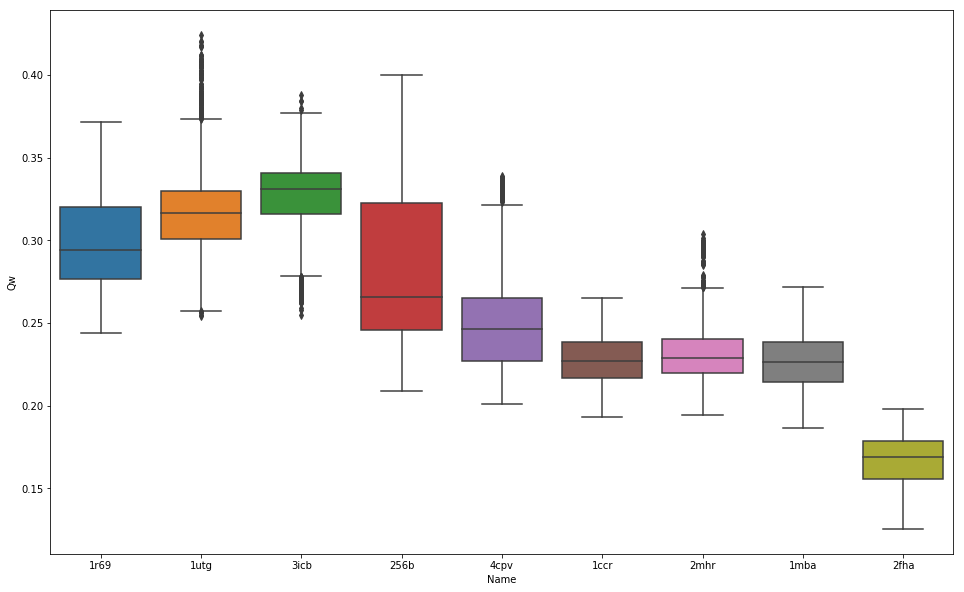

In [152]:
sns.boxplot("Name", "Qw", data=data)

## not nice. all going down (because all gamma is inversed)

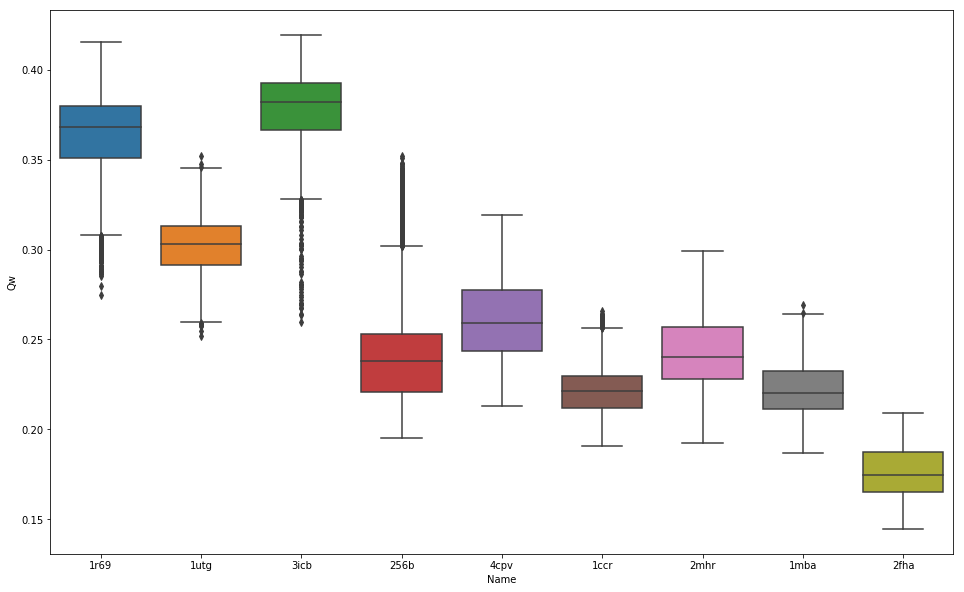

In [150]:
sns.boxplot("Name", "Qw", data=data)

# The original gamma.

In [147]:
pre = "/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/"
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
data = get_data(pre, pdb_list)

File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/3/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/3/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/9/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/9/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/15/1/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/15/2/wham.dat' does not exist
File b'/Users/weilu/Research/server_backup/jan_2019/iterative_optimization_2/all_simulations/1mba/simulation/19/1/wham.dat' does not exist
File b'/Users/weilu/Research/se

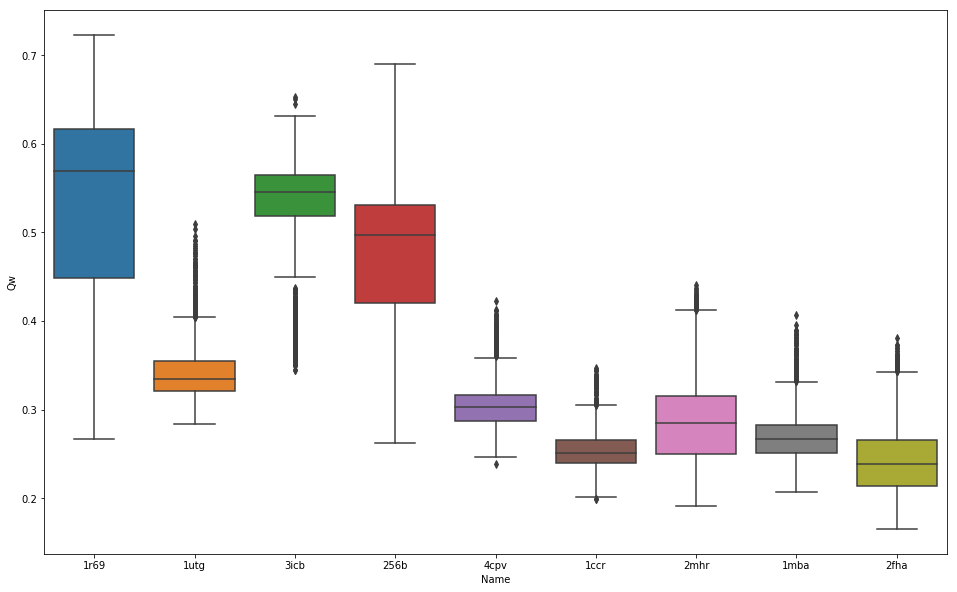

In [148]:
sns.boxplot("Name", "Qw", data=data)

# actually below is all 1r69.

In [ ]:
# to get last 20 frame of each run
_all = []
for p in pdb_list:
    name = p.lower()[:4]
    for i in range(20):
        for ii in range(3):
            location = pre + f"iterative_optimization/all_simulations/{name}/simulation/{i}/{ii}/wham.dat"
            tmp = pd.read_csv(location).tail(50).reset_index()
            tmp.columns = tmp.columns.str.strip()
            _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
data = pd.concat(_all)
data["Run"] = "Run" + data["Run"].astype(str)

In [140]:
data["Qw"].describe()

count    27000.000000
mean         0.519708
std          0.103103
min          0.278139
25%          0.424369
50%          0.547636
75%          0.612597
max          0.740108
Name: Qw, dtype: float64

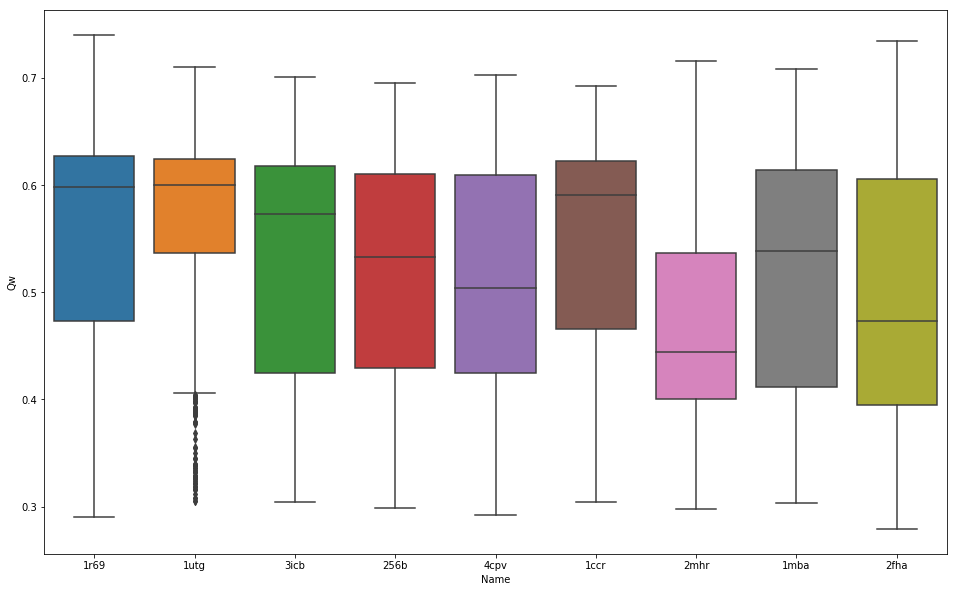

In [136]:
sns.boxplot("Name", "Qw", data=data)

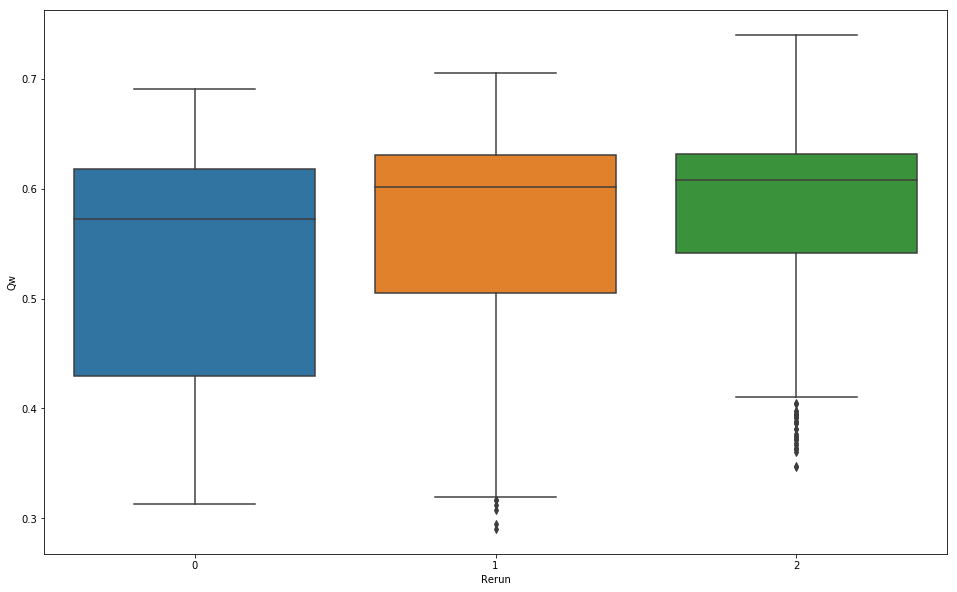

In [133]:
sns.boxplot("Rerun", "Qw", data=test)

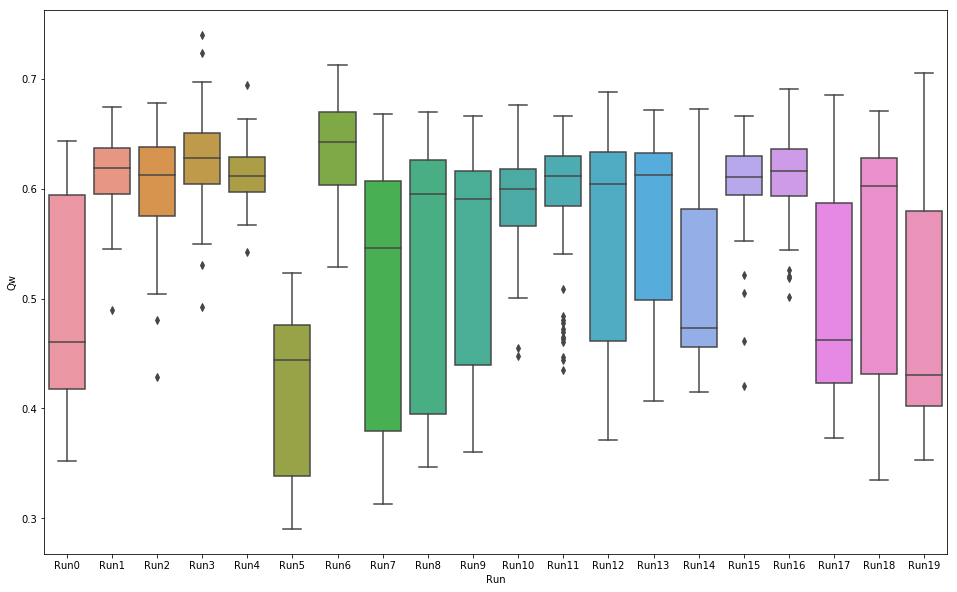

In [134]:
sns.boxplot("Run", "Qw", data=test)

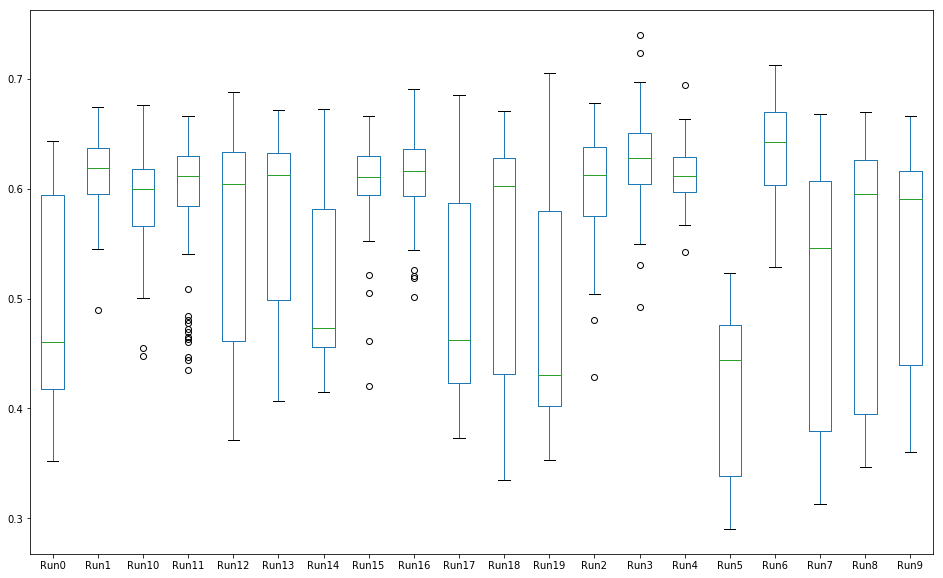

In [86]:
t1.plot.box()

In [76]:
test.groupby("Run")["Qw"].describe()

,count,mean,std,min,25%,50%,75%,max
Run,,,,,,,,
Run0,60.0,0.492063,0.093653,0.352099,0.417506,0.460681,0.593940,0.643896
Run1,60.0,0.613469,0.033499,0.489589,0.595621,0.618510,0.636664,0.674489
Run10,60.0,0.588040,0.048928,0.447847,0.566146,0.599418,0.618321,0.676286
Run11,60.0,0.587644,0.065438,0.434903,0.584271,0.611547,0.629385,0.666405
Run12,60.0,0.557059,0.097539,0.371032,0.461230,0.604372,0.633267,0.688444
Run13,60.0,0.575532,0.077769,0.406862,0.498207,0.612705,0.632616,0.671788
Run14,60.0,0.508262,0.073219,0.415144,0.455677,0.472969,0.581952,0.672595
Run15,60.0,0.604550,0.041980,0.420115,0.594624,0.611072,0.629712,0.666170
Run16,60.0,0.609762,0.038675,0.501425,0.593483,0.616208,0.636611,0.690865


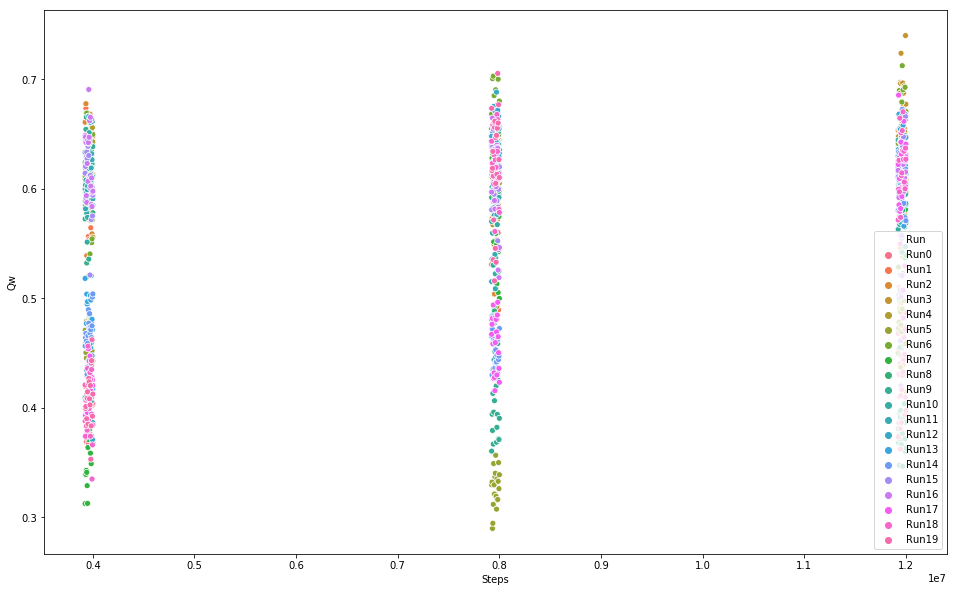

In [68]:
sns.scatterplot("Steps", "Qw", hue="Run", data=test)

In [16]:
# to get complete data
_all = []
for p in pdb_list:
    name = p.lower()[:4]
    for i in range(20):
        for ii in range(3):
            location = pre + f"iterative_optimization/all_simulations/{name}/simulation/{i}/{ii}/wham.dat"
            tmp = pd.read_csv(location)
            tmp.columns = tmp.columns.str.strip()
            _all.append(tmp.assign(Run=i, Name=name))
data = pd.concat(_all)

In [56]:
test = data.query("Name == '1r69'")

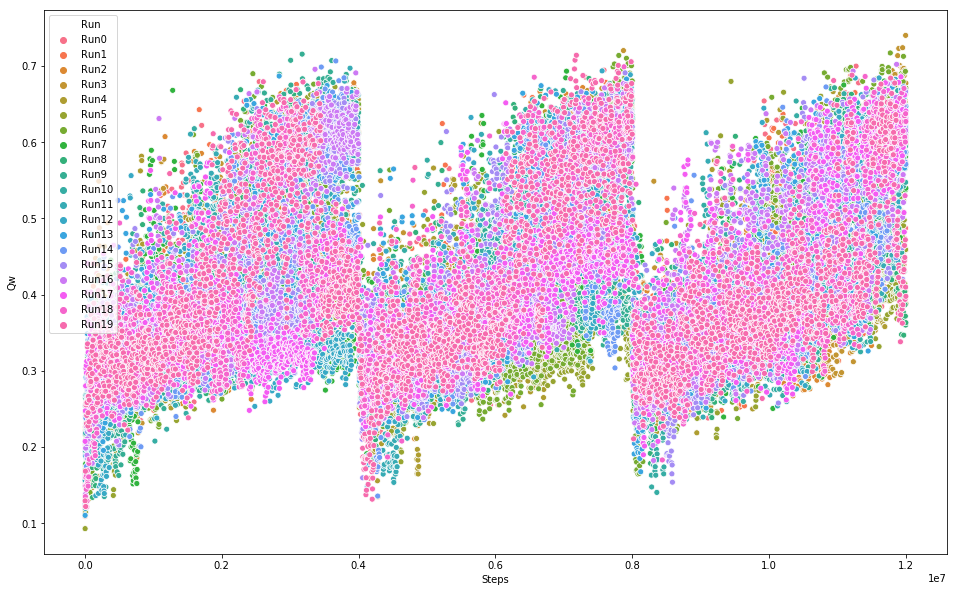

In [63]:
sns.scatterplot("Steps", "Qw", hue="Run", data=test)